In [ ]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.2/699.2 kB 5.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
from PIL import Image

def resize_image(input_path, output_path, target_size=(800, 534)):
    # Open the image
    image = Image.open(input_path)

    # Resize the image
    resized_image = image.resize(target_size, Image.ANTIALIAS)

    # Save the resized image
    resized_image.save(output_path)

def convert_to_grayscale(input_path, output_path):
    # Open the image
    image = Image.open(input_path)

    # Convert to grayscale
    grayscale_image = image.convert("L")

    # Save the result
    grayscale_image.save(output_path)


In [ ]:
model=YOLO('yolov8x-seg.pt')

100%|██████████| 137M/137M [00:00<00:00, 160MB/s]


In [ ]:
predict= model.predict('input.jpg',save=True,save_txt=True)
resize_image('input.jpg','test.png')


image 1/1 /content/input.jpg: 640x512 1 person, 10402.5ms
Speed: 22.6ms preprocess, 10402.5ms inference, 57.7ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/segment/predict
1 label saved to runs/segment/predict/labels


<ipython-input-4-4463b03603a6>:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(target_size, Image.ANTIALIAS)


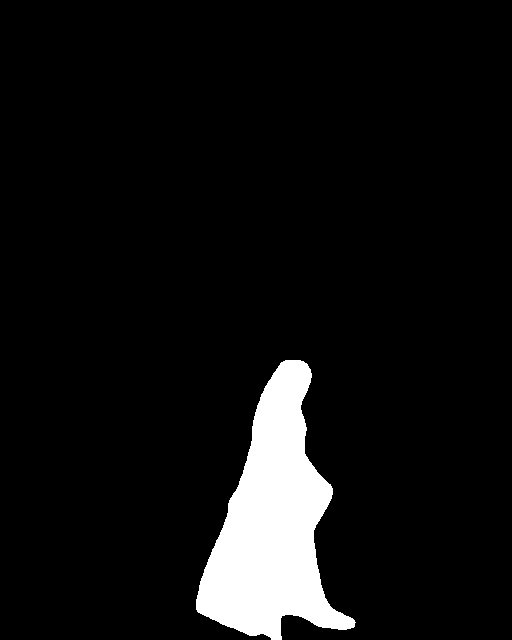

True

In [ ]:
mask=(predict[0].masks.data[0].numpy() * 255).astype('uint8')
cv2_imshow(mask)
cv2.imwrite("mask.png",mask)


In [ ]:

input_image_path = "mask.png"
output_image_path = "result.png"

convert_to_grayscale(input_image_path, output_image_path)


resize_image('mask.png',"resize_mask.png")


<ipython-input-4-4463b03603a6>:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(target_size, Image.ANTIALIAS)


<ipython-input-4-4463b03603a6>:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(target_size, Image.ANTIALIAS)


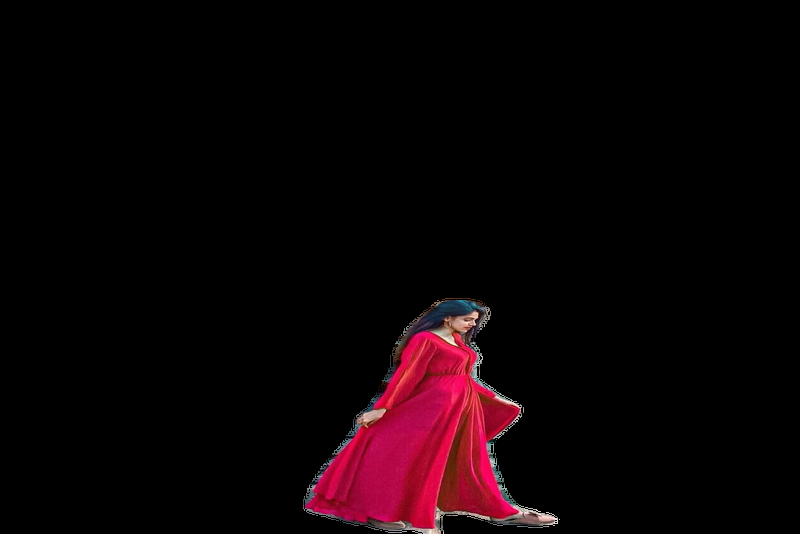

In [ ]:
resize_mask=cv2.imread("resize_mask.png")


# Load the original image
original_image = cv2.imread('test.png')


# Convert the mask to a 3-channel mask
mask_colored = cv2.merge([resize_mask, resize_mask, resize_mask])

# Mask the object in the original image
modified_image = original_image.copy()
modified_image[resize_mask == 0] = 0

cv2.imwrite("modified.png",modified_image)
resize_image("modified.png","remodified.png")
remodified_img = cv2.imread("remodified.png")
cv2_imshow(remodified_img)

In [ ]:


# Example usage




In [ ]:
!pip install simple_lama_inpainting
!pip install fastapi kaleido python-multipart uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 27.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=f399bcb66108628635382f18a2e407d2d7f36773acc3093b555566df92e5ba3a
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sourc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [ ]:
from simple_lama_inpainting import SimpleLama
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

simple_lama = SimpleLama()

img_path = "test.png"
mask_path = "resize_mask.png"

image = Image.open(img_path)
mask = Image.open(mask_path)

result = simple_lama(image, mask)
result.show()
result.save("inpainted.png")

Downloading: "https://github.com/enesmsahin/simple-lama-inpainting/releases/download/v0.1.0/big-lama.pt" to /root/.cache/torch/hub/checkpoints/big-lama.pt
100%|██████████| 196M/196M [00:02<00:00, 72.6MB/s]


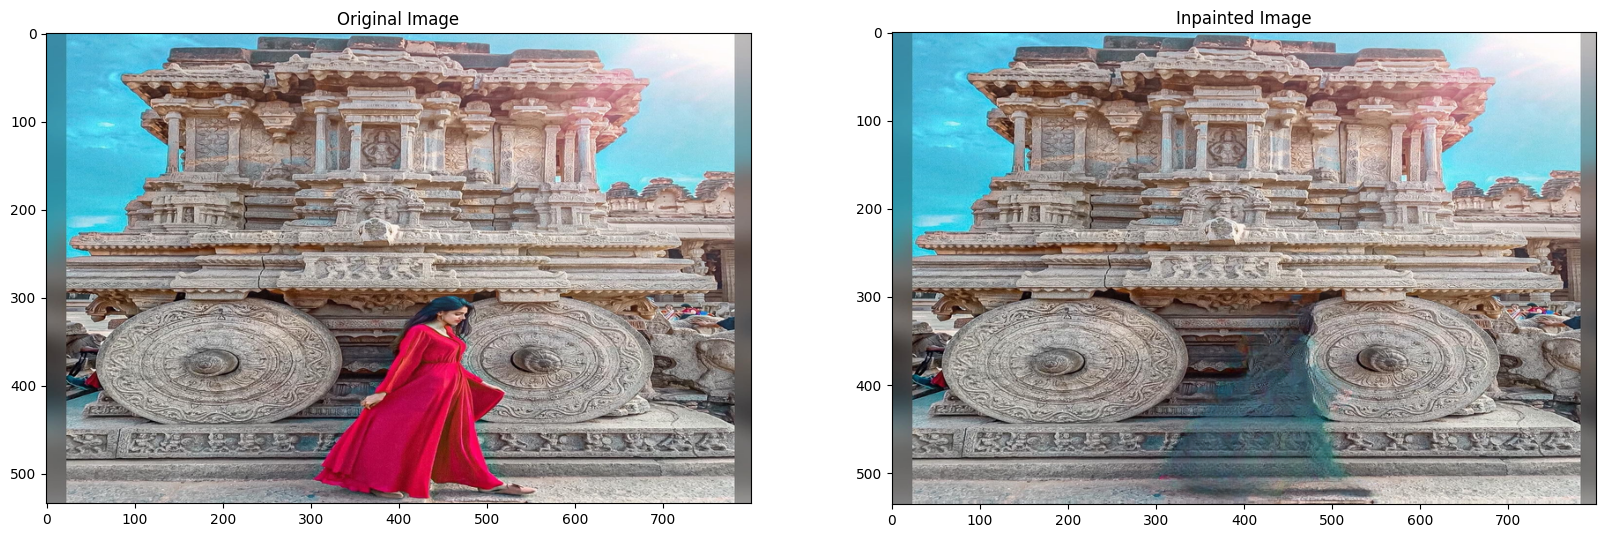

In [ ]:
import matplotlib.pyplot as plt


# Create a larger plot
plt.figure(figsize=(20, 40))


# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")


# Display the inpainted result
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title("Inpainted Image")

# Show the plots
plt.show()